In [1]:
#Jaiden Hausler
#ECGR 4105

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load in dataset
diabetes = pd.DataFrame(pd.read_csv("diabetes.csv")) 
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Split data set between parameters and output
X = diabetes.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
Y = diabetes.iloc[:, 8]

In [5]:
#split data set into X and Y training and testing sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
#80% data for training, 20% data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

#Standardizing the parameters so they are all equally weighted during training
scalerStand = StandardScaler()
X_train = scalerStand.fit_transform(X_train)
X_test = scalerStand.fit_transform(X_test)
X_train[1]

array([ 0.03644676, -0.75182191, -0.47230103,  0.14814855, -0.69965674,
       -0.50667229, -0.07049698, -0.96569189])

In [7]:
#######################Problem 1#######################

In [8]:
from sklearn.linear_model import LogisticRegression

#preforming logistic regression on the training set
np.random.seed(0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [9]:
#using the Logistic regression model to predict the output of testing set
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [10]:
#Creating a confusion matrix that compares predicted values to actual values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [11]:
#Printing the accuracy, precision, and recall
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447


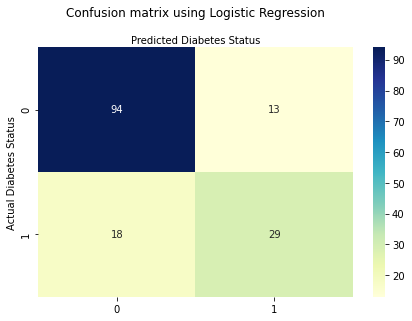

In [12]:
#Plotting Confusion Matrix of predicted vs actual values
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix using Logistic Regression', y=1.1) 
plt.ylabel('Actual Diabetes Status') 
plt.xlabel('Predicted Diabetes Status') ;

In [13]:
####################Problem 2##############################

In [14]:
#Performing Gaussian Naive Bayes Theorm on the training set
from sklearn.naive_bayes import GaussianNB
classifier0 = GaussianNB()
classifier0.fit(X_train, Y_train)

GaussianNB()

In [15]:
#Using the Gaussian Naive Bayes model to predict output of testing set
Y2_pred = classifier0.predict(X_test)
Y2_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [16]:
#Creating a confusion matrix that compares predicted values to actual values
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(Y_test, Y2_pred)
cm1

array([[87, 20],
       [16, 31]], dtype=int64)

In [17]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y2_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y2_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y2_pred))

Accuracy: 0.7662337662337663
Precision: 0.6078431372549019
Recall: 0.6595744680851063


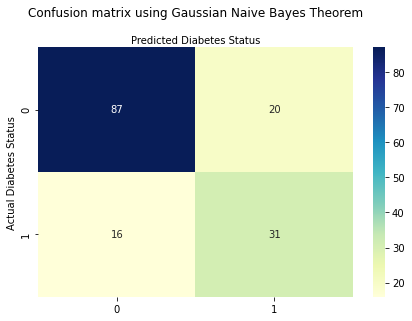

In [18]:
#Plotting Confusion Matrix of predicted vs actual values
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix using Gaussian Naive Bayes Theorem', y=1.1) 
plt.ylabel('Actual Diabetes Status') 
plt.xlabel('Predicted Diabetes Status') ;

In [19]:
#######################Problem 3######################

In [20]:
#Splitting the dataset into parameters and output to preform KFold Cross-Validation
X = diabetes.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
Y = diabetes.iloc[:, 8]

#Standardizing the parameters so they are weighted equally
X = scalerStand.fit_transform(X)

#Creating arrays to store accuracy, precision, recall, predicted values, and actual values
acc_score = []
precision_score = []
recall_score = []
predicted_targets = np.array([])
actual_targets = np.array([])

In [21]:
#performing K-Fold Cross-Validation with k=5 with a Logistic Regression Approach
from sklearn.model_selection import KFold
np.random.seed(0)
kf5 = KFold(n_splits = 5, random_state = 0, shuffle = True)

#Performing logistic regression on the training set for each iteration 
for train_index, test_index in kf5.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]
    
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    
    #storing predicted values and actual values over each iteration
    predicted_targets = np.append(predicted_targets, Y_pred)
    actual_targets = np.append(actual_targets, y_test)
    
    #Storing accuracy, precision, and recall for each iteration
    acc = metrics.accuracy_score(Y_pred, y_test)
    acc_score.append(acc)
        
    pres = metrics.precision_score(Y_pred, y_test)
    precision_score.append(pres)
    
    recall = metrics.recall_score(Y_pred, y_test)
    recall_score.append(recall)
    
#finding the average accuracy, precision, and recall
avg_acc_score = sum(acc_score)/5   
avg_pres_score = sum(precision_score)/5
avg_recall_score = sum(recall_score)/5

print('avg accuracy for k=5 : {}'.format(avg_acc_score))
print('avg precision for k=5 : {}'.format(avg_pres_score))
print('avg recall for k=5 : {}'.format(avg_recall_score))

avg accuracy for k=5 : 0.7734063322298617
avg precision for k=5 : 0.5683141996715554
avg recall for k=5 : 0.7307994363835186


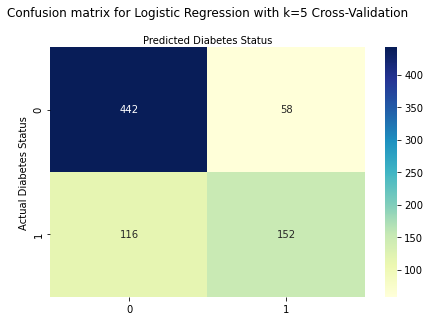

In [22]:
#Plotting Confusion Matrix of predicted vs actual values
cm2 = confusion_matrix(actual_targets, predicted_targets) 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Logistic Regression with k=5 Cross-Validation', y=1.1) 
plt.ylabel('Actual Diabetes Status') 
plt.xlabel('Predicted Diabetes Status') ;

In [23]:
#Creating arrays to store accuracy, precision, recall, predicted values, and actual values
acc_score1 = []
precision_score1 = []
recall_score1 = []
predicted_targets1 = np.array([])
actual_targets1 = np.array([])

#performing K-Fold Cross-Validation with k=10 with a Logistic Regression Approach
np.random.seed(0)
kf10 = KFold(n_splits = 10, random_state = 0, shuffle = True)

#Performing logistic regression on the training set for each iteration 
for train_index, test_index in kf10.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]
    
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    
    #storing predicted values and actual values over each iteration
    predicted_targets1 = np.append(predicted_targets1, Y_pred)
    actual_targets1 = np.append(actual_targets1, y_test)

    #Storing accuracy, precision, and recall for each iteration
    acc = metrics.accuracy_score(Y_pred, y_test)
    acc_score1.append(acc)
    
    pres = metrics.precision_score(Y_pred, y_test)
    precision_score1.append(pres)
    
    recall = metrics.recall_score(Y_pred, y_test)
    recall_score1.append(recall)
     
#finding the average accuracy, precision, and recall
avg_acc_score1 = sum(acc_score1)/10    
avg_pres_score1 = sum(precision_score1)/10
avg_recall_score1 = sum(recall_score1)/10
    
print('avg accuracy for k=10 : {}'.format(avg_acc_score1))
print('avg precision for k=10 : {}'.format(avg_pres_score1))
print('avg recall for k=10 : {}'.format(avg_recall_score1))

avg accuracy for k=10 : 0.7760423786739576
avg precision for k=10 : 0.5684261777890447
avg recall for k=10 : 0.7310060312662615


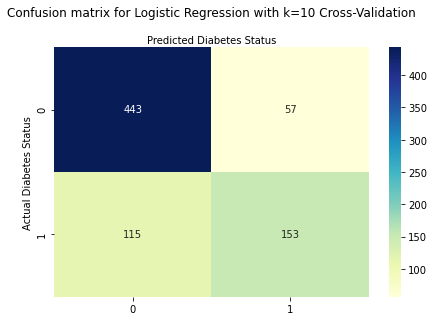

In [24]:
#Plotting Confusion Matrix of predicted vs actual values
cm3 = confusion_matrix(actual_targets1, predicted_targets1) 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Logistic Regression with k=10 Cross-Validation', y=1.1) 
plt.ylabel('Actual Diabetes Status') 
plt.xlabel('Predicted Diabetes Status') ;

In [25]:
####################Problem 4###########################

In [26]:
#Creating arrays to store accuracy, precision, recall, predicted values, and actual values
acc_score2 = []
precision_score2 = []
recall_score2 = []
predicted_targets2 = np.array([])
actual_targets2 = np.array([])

#performing K-Fold Cross-Validation with k=5
#Performing Gaussian Naive Bayes Theorm on the training set for each iteration
for train_index, test_index in kf5.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]
    
    classifier0.fit(X_train, y_train)
    Y_pred = classifier0.predict(X_test)

    #storing predicted values and actual values over each iteration
    predicted_targets2 = np.append(predicted_targets2, Y_pred)
    actual_targets2 = np.append(actual_targets2, y_test)
    
    #Storing accuracy, precision, and recall for each iteration
    acc = metrics.accuracy_score(Y_pred, y_test)
    acc_score2.append(acc)
    
    pres = metrics.precision_score(Y_pred, y_test)
    precision_score2.append(pres)
    
    recall = metrics.recall_score(Y_pred, y_test)
    recall_score2.append(recall)
    
#finding the average accuracy, precision, and recall
avg_acc_score2 = sum(acc_score2)/5    
avg_pres_score2 = sum(precision_score2)/5
avg_recall_score2 = sum(recall_score2)/5
    
print('avg accuracy for k=5 : {}'.format(avg_acc_score2))
print('avg precision for k=5 : {}'.format(avg_pres_score2))
print('avg recall for k=5 : {}'.format(avg_recall_score2))

avg accuracy for k=5 : 0.7487140310669722
avg precision for k=5 : 0.5958395809212899
avg recall for k=5 : 0.6528155200452331


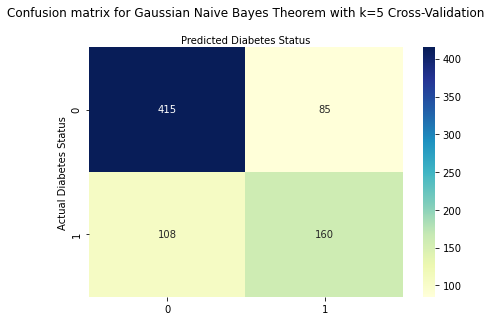

In [27]:
#Plotting Confusion Matrix of predicted vs actual values
cm4 = confusion_matrix(actual_targets2, predicted_targets2) 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Gaussian Naive Bayes Theorem with k=5 Cross-Validation', y=1.1) 
plt.ylabel('Actual Diabetes Status') 
plt.xlabel('Predicted Diabetes Status') ;

In [28]:
#Creating arrays to store accuracy, precision, recall, predicted values, and actual values
acc_score3 = []
precision_score3 = []
recall_score3 = []
predicted_targets3 = np.array([])
actual_targets3 = np.array([])

#performing K-Fold Cross-Validation with k=10
#Performing Gaussian Naive Bayes Theorm on the training set for each iteration
for train_index, test_index in kf10.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]
    
    classifier0.fit(X_train, y_train)
    Y_pred = classifier0.predict(X_test)

    #storing predicted values and actual values over each iteration
    predicted_targets3 = np.append(predicted_targets3, Y_pred)
    actual_targets3 = np.append(actual_targets3, y_test)
    
    #Storing accuracy, precision, and recall for each iteration
    acc = metrics.accuracy_score(Y_pred, y_test)
    acc_score3.append(acc)
    
    pres = metrics.precision_score(Y_pred, y_test)
    precision_score3.append(pres)
    
    recall = metrics.recall_score(Y_pred, y_test)
    recall_score3.append(recall)
    
#finding the average accuracy, precision, and recall 
avg_acc_score3 = sum(acc_score3)/10    
avg_pres_score3 = sum(precision_score3)/10
avg_recall_score3 = sum(recall_score3)/10
    
print('avg accuracy for k=5 : {}'.format(avg_acc_score3))
print('avg precision for k=5 : {}'.format(avg_pres_score3))
print('avg recall for k=5 : {}'.format(avg_recall_score3))

avg accuracy for k=5 : 0.748632946001367
avg precision for k=5 : 0.5858645366945894
avg recall for k=5 : 0.6558350289058493


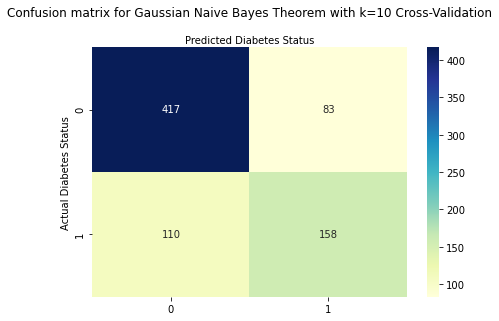

In [29]:
#Plotting Confusion Matrix of predicted vs actual values
cm5 = confusion_matrix(actual_targets3, predicted_targets3) 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Gaussian Naive Bayes Theorem with k=10 Cross-Validation', y=1.1) 
plt.ylabel('Actual Diabetes Status') 
plt.xlabel('Predicted Diabetes Status') ;